***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", palette="winter_r")

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
ds = "./dados.csv"
df = pd.read_csv(ds)

### Visualize o conteúdo do DataFrame

In [3]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

-------------------------------

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576



Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

### 2º Definir os labels das classes

In [5]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [6]:
pd.cut(x=df.Renda,
      bins=classes,
      labels=labels,
      include_lowest=True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [7]:
frequencia = pd.value_counts(
    pd.cut(x=df.Renda,
          bins=classes,
          labels=labels,
          include_lowest=True)
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [8]:
percentual = pd.value_counts(
    pd.cut(x=df.Renda,
    bins=classes,
    labels=labels,
    include_lowest=True), normalize=True
)
percentual = round(percentual*100,2)
percentual

E    64.75
D    21.73
C     9.89
B     2.83
A     0.79
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [9]:
freq_perc = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
#freq_perc.index = freq_perc.sort_values(ascending=False)
freq_perc.sort_index(ascending=False, inplace=True)
freq_perc

,Frequência,Porcentagem (%)
A,608,0.79
B,2178,2.83
C,7599,9.89
D,16700,21.73
E,49755,64.75


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

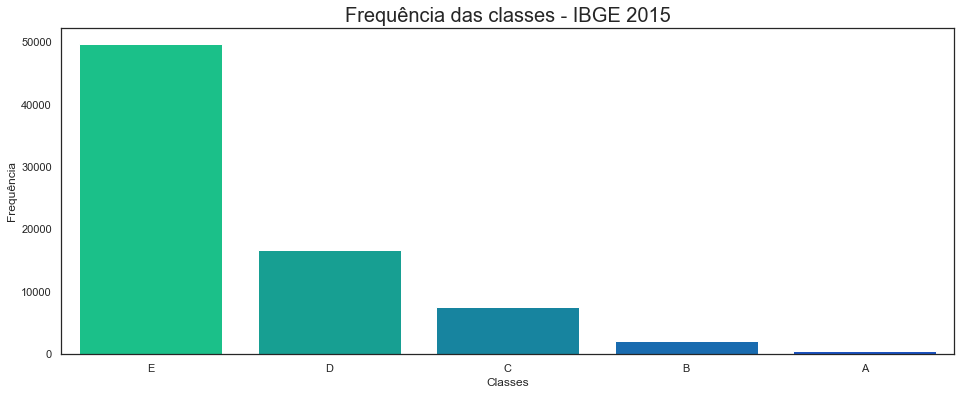

In [29]:
# Alterar gráfico, colocar junto as classes 
plt.figure(figsize=(16, 6))
plt.title("Frequência das classes - IBGE 2015", fontsize=20)
ax = sns.barplot(x=freq_perc.index.sort_values(ascending=False), y="Frequência", data=freq_perc) 
ax.set_xlabel('Classes');

> ### Conclusões

Com base nos dados do IBGE e a partir das análises realizadas, é possível concluir que a Classe E (classe social mais pobre) é a classe mais abrangente, correspondendo a 64,75% dos dados. Enquanto a Classe A (classe social mais rica) é a minoria, correspondendo a 0.79%. 

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [11]:
df.head() #Renda Altura Idade

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


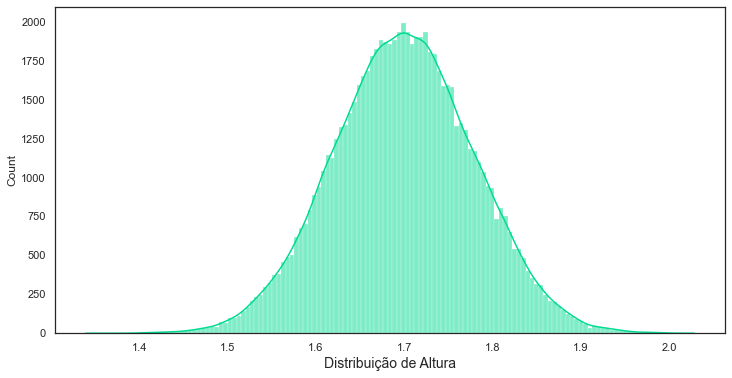

In [30]:
ax = sns.histplot(df["Altura"], kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_xlabel('Distribuição de Altura', fontsize=14);

<AxesSubplot:>

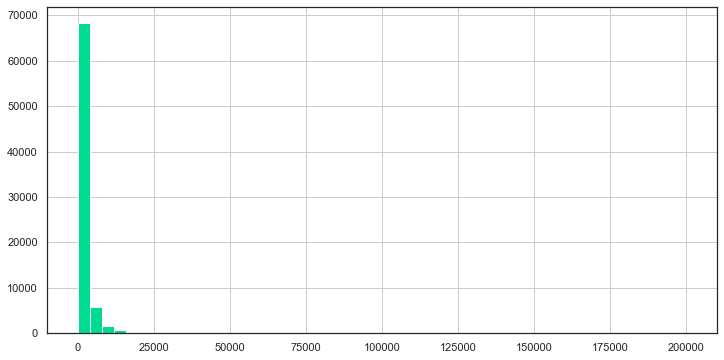

In [31]:
df.Renda.hist(bins=50, figsize=(12, 6))

> ### Conclusões

**Variável Altura**: De acordo com o gráfico de Altura, podemos concluir que os dados estão bem distribuídos, provavelmente não havendo valores discrepantes.
 
**Variável Renda**: Em relação à variável Renda, podemos dizer a partir do gráfico que temos valores discrepantes nos dados, deixando a análise com ruído. É de extrema importância realizarmos uma investigação mais profunda dos outliers (valores discrepante) que estão atrapalhando a análise.


### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

C:\Users\26541\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


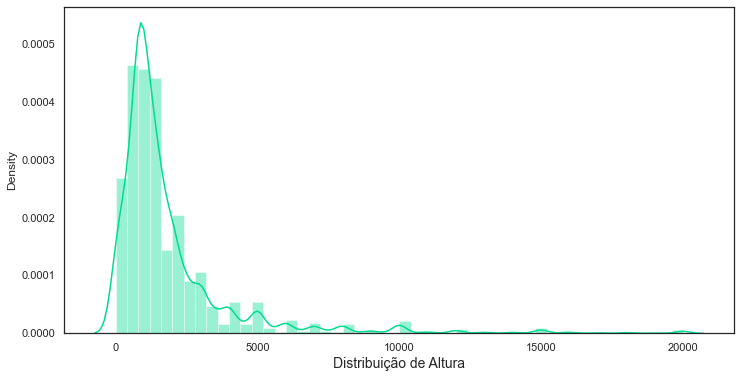

In [40]:
ax = sns.distplot(df.query('Renda <= 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax.set_xlabel('Distribuição de Altura', fontsize=14);

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [45]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [43]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [47]:
df['Sexo'] = df['Sexo'].map(sexo)
df['Cor'] = df['Cor'].map(cor)
df['Anos de Estudo'] = df['Anos de Estudo'].map(anos_de_estudo)
df['UF'] = df['UF'].map(uf)
    

In [85]:
frequencia1 = pd.crosstab(df.Sexo,
                        df.Cor)
frequencia1

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


In [63]:
percentual = round(pd.crosstab(df.Sexo,
                        df.Cor,
                        normalize=True)*100, 2)
percentual

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,0.15,12.52,0.13,14.14,3.76
Masculino,0.31,28.88,0.33,32.62,7.16


> ### Conclusões

Realizando o cruzamento das variáveis Cor e Sexo, podemos concluir que todas as etnias do sexo masculino possuem maiores quantidades em relação ao sexo feminino. Em relação as etnias, a cor Parda apresenta maior quantidade, com 32,62% dos dados, seguindo da cor Branca com 28,88% em ambos os sexos, masculino e femino.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [64]:
df.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [65]:
df.Renda.median()

1200.0

### Obtenha a moda

In [66]:
df.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [71]:
 df.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [72]:
df.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [73]:
df.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [76]:
percentual = pd.crosstab(df.Sexo,
                        df.Cor,
                        aggfunc={'mean', 'median', 'max'},
                        values=df.Renda)

percentual.T

Sexo                  Feminino      Masculino
       Cor                                   
max    Amarela    20000.000000   50000.000000
       Branca    100000.000000  200000.000000
       Indígena  120000.000000   10000.000000
       Parda      30000.000000  100000.000000
       Preta      23000.000000   50000.000000
mean   Amarela     3027.341880    4758.251064
       Branca      2109.866750    2925.744435
       Indígena    2464.386139    1081.710938
       Parda       1176.758516    1659.577425
       Preta       1134.596400    1603.861687
median Amarela     1500.000000    2800.000000
       Branca      1200.000000    1700.000000
       Indígena     788.000000     797.500000
       Parda        800.000000    1200.000000
       Preta        800.000000    1200.000000

> ### Conclusões

De acordo com a tabela gerada, podemos verificar extrair informações importantes em relação a algumas estatísticas dos dados.

**Valores Máximo de Renda:** Existem alguns valores extremamente altos, considerados *outliers*. O ideal seria realizar uma análise mais aprofundada dos dados para verificar o que esses valores representam.

**Média das Rendas:** Podemos verificar que em ambos os sexos, em média, os valores maiores de renda correspondem a etnia de cor Amarela. 

**Mediana**: A mediana é uma medida estatística que divide o conjunto de dados exatamente na metade. Ao utilizar a mediana evitamos que valores extremos influenciem no resultado. De acordo com a tabela frequencia, podemos observar que o valor da mediana é menor que o valor da média, pois a média foi influenciada por valores discrepantes, conforme já foi observado na análise. 

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [83]:
percentual = pd.crosstab(df.Sexo,
                        df.Cor,
                        aggfunc={'mad', 'var', 'std'},
                        values=df.Renda)

percentual.T

Sexo              Feminino     Masculino
    Cor                                 
mad Amarela   2.549146e+03  3.709597e+03
    Branca    1.670967e+03  2.261012e+03
    Indígena  3.007893e+03  7.989109e+02
    Parda     8.115809e+02  1.125828e+03
    Preta     7.054534e+02  9.756025e+02
std Amarela   3.731174e+03  5.740825e+03
    Branca    3.251013e+03  4.750792e+03
    Indígena  1.195750e+04  1.204093e+03
    Parda     1.596233e+03  2.312087e+03
    Preta     1.349800e+03  1.936309e+03
var Amarela   1.392166e+07  3.295707e+07
    Branca    1.056909e+07  2.257002e+07
    Indígena  1.429818e+08  1.449841e+06
    Parda     2.547960e+06  5.345747e+06
    Preta     1.821960e+06  3.749294e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [117]:
renda_menor_dezK = df.query("Renda < 10000")
renda_menor_dezK.Renda.max()

9975

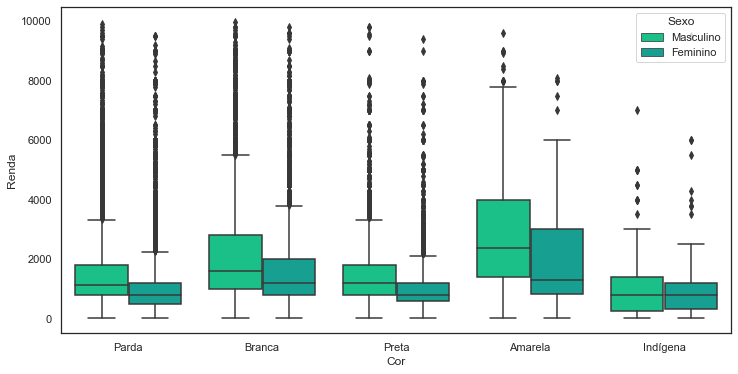

In [123]:
ax = sns.boxplot(data=renda_menor_dezK, x="Cor", y="Renda", hue="Sexo")
ax.figure.set_size_inches(12, 6)

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [191]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,11 anos,800,1.603808
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.739790
2,Rondônia,Feminino,35,Parda,14 anos,880,1.760444
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.783158
4,Rondônia,Feminino,47,Parda,8 anos,150,1.690631


Maneira 1 de realizar o processo

In [216]:
salarios_menor_minimo = []
for i in df.Renda:
    if (i<=788):
        salarios_menor_minimo.append(i)

type(salarios_menor_minimo) #lista
len(salarios_menor_minimo) #22182

total_salarios = df.Renda.tolist()
type(total_salarios)#lista
len(total_salarios)#76840

print(round(len(salarios_menor_minimo)/len(total_salarios)*100,2),"%")

28.87 %


Maneira 2 de realizar o processo

In [215]:
from scipy import stats

percentual = stats.percentileofscore(df.Renda, 788, kind='weak')
print("{0:.2f}%".format(percentual))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [202]:
print("R$", df.Renda.quantile(q=0.99))

R$ 15000.0


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [230]:
percentual2 = pd.crosstab(df['Anos de Estudo'],
                        df.Sexo,
                        aggfunc={'mean', 'median', 'std'},
                        values=df.Renda)

percentual2

mean                median            \
Sexo                               Feminino    Masculino Feminino Masculino   
Anos de Estudo                                                                
1 ano                            492.771987   895.629047    400.0     788.0   
10 anos                          925.919225  1731.270847    800.0    1218.0   
11 anos                         1286.790889  2117.060504   1000.0    1500.0   
12 anos                         1682.313725  2470.330776   1200.0    1800.0   
13 anos                         1911.730047  3195.099154   1300.0    2400.0   
14 anos                         2226.460457  3706.620269   1600.0    2500.0   
15 anos ou mais                 3899.513231  6134.279790   2800.0    4000.0   
2 anos                           529.911638   931.178986    450.0     788.0   
3 anos                           546.853916  1109.203862    500.0     800.0   
4 anos                           704.279111  1302.329283    788.0    1000.0   
5 anos                           781.389776  1338.653218    788.0    1045.0   
6 anos                           833.732824  1448.875419    788.0    1200.0   
7 anos                           830.751004  1465.497940    788.0    1200.0   
8 anos                           933.615351  1639.396667    800.0    1300.0   
9 anos                           868.021700  1508.038850    788.0    1200.0   
Não determinados                 798.174419  1295.761905    788.0    1200.0   
Sem instrução e menos de 1 ano   516.201748   799.494638    390.0     700.0   

                                        std               
Sexo                               Feminino    Masculino  
Anos de Estudo                                            
1 ano                            425.291842  1331.950552  
10 anos                          620.611907  2078.609734  
11 anos                         1819.040417  2676.538942  
12 anos                         4851.833513  2268.081538  
13 anos                         2053.789771  2797.116800  
14 anos                         2064.083336  3987.214974  
15 anos ou mais                 4212.770709  7447.613594  
2 anos                           498.234168  1435.173827  
3 anos                           424.124446  2143.800133  
4 anos                           629.553397  1419.821787  
5 anos                           635.782641  1484.650587  
6 anos                           574.547028  1476.628602  
7 anos                           602.038029  1419.708673  
8 anos                           896.781213  1515.583715  
9 anos                           973.221652  2137.664774  
Não determinados                 459.985964   979.648745  
Sem instrução e menos de 1 ano   639.311534  1023.904884

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [272]:
renda_menor_dezK_idade = df.query("Renda < 10000 and Idade == 40").sort_values(by='Anos de Estudo', ascending=True)
renda_menor_dezK_idade.Renda.max()

9700

In [273]:
renda_menor_dezK_idade.Idade.max()
renda_menor_dezK_idade.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
9438,Pará,Masculino,40,Parda,1 ano,700,1.648551
7876,Pará,Masculino,40,Preta,1 ano,500,1.736724
34197,Minas Gerais,Masculino,40,Branca,1 ano,500,1.727223
74572,Goiás,Masculino,40,Preta,1 ano,1000,1.649129
25396,Sergipe,Masculino,40,Parda,1 ano,800,1.614638


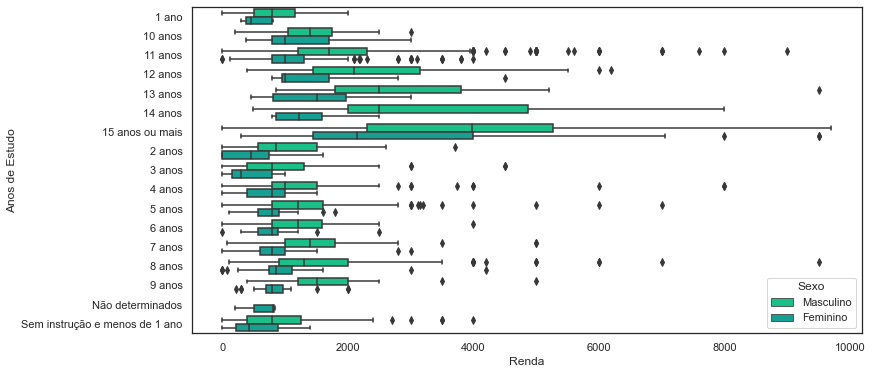

In [274]:
ax = sns.boxplot(data=renda_menor_dezK_idade, x="Renda", y="Anos de Estudo", hue="Sexo")
ax.figure.set_size_inches(12, 6)

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

> ### Conclusões

Escreva suas conclusões aqui...